# **Hugging Face Tutorial**

- This script contains practical examples of using Hugging Face's libraries for various NLP and ML tasks.

- First let's install the necessary packages:

    `pip install transformers datasets evaluate accelerate sentencepiece`

In [2]:
# Only if want to ignore the warnings message
import warnings
warnings.filterwarnings('ignore')

In [11]:
pip install transformers datasets evaluate accelerate sentencepiece


  Using cached datasets-3.5.1-py3-none-any.whl.metadata (19 kB)
  Using cached evaluate-0.4.3-py3-none-any.whl.metadata (9.2 kB)
  Using cached accelerate-1.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 992.0/992.0 kB 5.8 MB/s eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.2
    Uninstalling tqdm-4.66.2:
      Successfully uninstalled tqdm-4.66.2
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.4
    Uninstalling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dbt-core 1.7.18 requires protobuf<5,>=4.0.0, but you have protobuf 5.29.3 which is incompatible.
google-api-core 2.19.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.29.3 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.3.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
streamlit 1.31.1 requires protobuf<5,>=3.20, but you have protobuf 5.29.3 which is incompatible.
tensorflow-intel 2.16.2 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.3 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] 

## Example 1 : Text Classification

Using a pre-trained model for sentiment analysis

In [2]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Analyze some text
texts = [
    "I love using Hugging Face's transformers library!",
    "This movie was terrible and boring.",
    "The food at the restaurant was decent, but the service was slow."
]

results = sentiment_analyzer(texts)

# Display results
for text, result in zip(texts, results):
    print(f"Text: {text}")
    print(f"Sentiment: {result['label']}")
    print(f"Confidence: {result['score']:.4f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.



Text: I love using Hugging Face's transformers library!
Sentiment: POSITIVE
Confidence: 0.9978

Text: This movie was terrible and boring.
Sentiment: NEGATIVE
Confidence: 0.9998

Text: The food at the restaurant was decent, but the service was slow.
Sentiment: NEGATIVE
Confidence: 0.9981



## Example 2 : Named Entity Recognition

Identifying entities like people, organizations, locations in text:

In [3]:
from transformers import pipeline

# Initialize the NER pipeline
ner_pipeline = pipeline("ner")

# Text to analyze
text = "My name is Sarah and I work at Microsoft in Seattle. I met with John from Google last week in New York."

# Get entities
entities = ner_pipeline(text)

# Group entities by word
grouped_entities = {}
for entity in entities:
    word = entity["word"]
    if word not in grouped_entities:
        grouped_entities[word] = []
    grouped_entities[word].append(entity)

# Display entities nicely
for word, word_entities in grouped_entities.items():
    entity_type = word_entities[0]["entity"]
    score = word_entities[0]["score"]
    print(f"Word: {word}\nEntity Type: {entity_type}\nConfidence: {score:.4f}\n")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Word: Sarah
Entity Type: I-PER
Confidence: 0.9988

Word: Microsoft
Entity Type: I-ORG
Confidence: 0.9996

Word: Seattle
Entity Type: I-LOC
Confidence: 0.9987

Word: John
Entity Type: I-PER
Confidence: 0.9982

Word: Google
Entity Type: I-ORG
Confidence: 0.9993

Word: New
Entity Type: I-LOC
Confidence: 0.9993

Word: York
Entity Type: I-LOC
Confidence: 0.9994



## Example 3 : Text Generation

Generating text completions with GPT-2:

In [4]:
from transformers import pipeline

# Initialize text generation pipeline with GPT-2
generator = pipeline('text-generation', model='gpt2')

# Generate text from prompts
prompts = [
    "Once upon a time,",
    "The future of artificial intelligence",
    "Hugging Face is"
]

for prompt in prompts:
    print(f"Prompt: {prompt}")
    result = generator(prompt, max_length=50, num_return_sequences=1)
    print(f"Generated: {result[0]['generated_text']}\n")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Once upon a time,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated: Once upon a time, it would look like a normal day. For most people, as well as for others, an easy day is an excellent day to look forward to. And while we may not expect many of us (the more affluent the more

Prompt: The future of artificial intelligence


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated: The future of artificial intelligence is still unclear. It's an open question whether any of the machines that follow us - robots who understand, think and act independently of us - can learn how to be human. For now, the only one we know of

Prompt: Hugging Face is
Generated: Hugging Face is all about going over a couple of things like that, and getting to know one of them. When you're talking about this topic, you may hear some people refer to it as "playing God in your head," but it is



## Example 4 : Question Answering

Using a model to answer questions based on provided context:

In [5]:
from transformers import pipeline

# Initialize the question answering pipeline
qa_pipeline = pipeline("question-answering")

# Context and questions
context = """
Hugging Face is an AI community and platform that was founded in 2016 by Clément Delangue, 
Julien Chaumond, and Thomas Wolf. The company is based in New York City, USA and Paris, France. 
Hugging Face is known for its transformers library which provides pretrained models for natural 
language processing tasks. In 2021, the company raised $40 million in Series B funding to 
expand its team and services.
"""

questions = [
    "When was Hugging Face founded?",
    "Who founded Hugging Face?",
    "What is Hugging Face known for?",
    "How much funding did Hugging Face raise in Series B?"
]

for question in questions:
    result = qa_pipeline(question=question, context=context)
    print(f"Question: {question}")
    print(f"Answer: {result['answer']}")
    print(f"Confidence: {result['score']:.4f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Question: When was Hugging Face founded?
Answer: 2016
Confidence: 0.9824

Question: Who founded Hugging Face?
Answer: Clément Delangue, 
Julien Chaumond, and Thomas Wolf
Confidence: 0.9408

Question: What is Hugging Face known for?
Answer: transformers library
Confidence: 0.4790

Question: How much funding did Hugging Face raise in Series B?
Answer: $40 million
Confidence: 0.8878



## Example 5 : Image Classification

Classifying images using a pre-trained vision model:

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


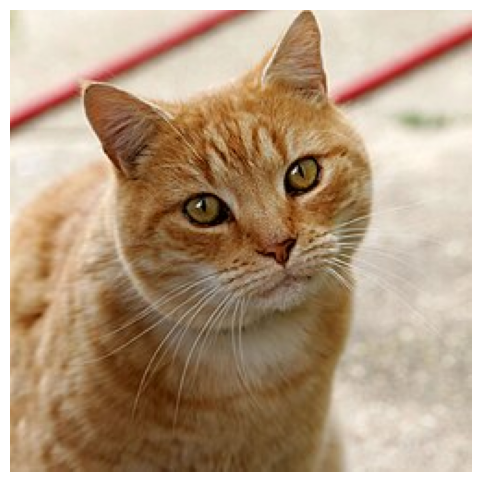

Top 5 predictions:
tiger cat: 0.3434
tabby, tabby cat: 0.3196
Egyptian cat: 0.2599
lynx, catamount: 0.0045
broom: 0.0026



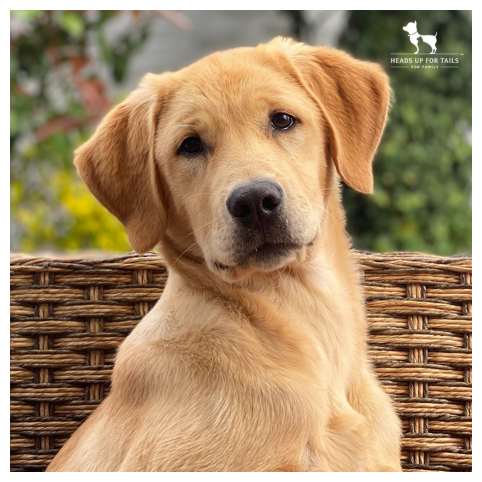

Top 5 predictions:
golden retriever: 0.7703
Labrador retriever: 0.1513
kuvasz: 0.0067
tennis ball: 0.0050
Rhodesian ridgeback: 0.0025



In [9]:
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Install matplotlib if not already installed
# pip install matplotlib

# Initialize image classification pipeline
image_classifier = pipeline("image-classification")

# Function to fetch and display an image
def classify_image(image_url):
    # Download the image
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    
    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
    # Classify the image
    result = image_classifier(image)
    
    # Display top 5 predictions
    print("Top 5 predictions:")
    for item in result[:5]:
        print(f"{item['label']}: {item['score']:.4f}")
    print()

# Example images
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/250px-Cat03.jpg",  # Cat
    "https://cdn.shopify.com/s/files/1/0086/0795/7054/files/Golden-Retriever.jpg?v=1645179525"  # Dog
]

for url in image_urls:
    classify_image(url)

## Example 6 : Summarization

Creating summaries of longer text:

In [6]:
from transformers import pipeline

# Initialize summarization pipeline
summarizer = pipeline("summarization")

# Long text to summarize
article = """
Artificial intelligence (AI) is transforming the landscape of technology and society at an unprecedented pace. 
The field, which focuses on creating machines and systems capable of performing tasks that would typically 
require human intelligence, has seen remarkable progress in recent years. Machine learning, a subset of AI, 
enables computers to learn from data and improve their performance without explicit programming. Deep learning, 
a further specialized area, utilizes neural networks with many layers to analyze complex patterns in large datasets.

The applications of AI are vast and diverse. In healthcare, AI systems are being used to diagnose diseases, 
predict patient outcomes, and accelerate drug discovery. In transportation, autonomous vehicles powered by AI 
are being developed to revolutionize how we travel. Financial institutions employ AI for fraud detection, 
risk assessment, and algorithmic trading. In entertainment, AI is used to recommend content, enhance gaming 
experiences, and even create music and art.

Despite these advances, AI also presents challenges and ethical considerations. Concerns about job displacement, 
privacy infringements, algorithmic bias, and the potential for autonomous weapons systems have sparked important 
discussions about responsible AI development. Policymakers, researchers, and industry leaders are working to establish 
frameworks and guidelines to ensure that AI serves humanity's best interests while minimizing potential harms.

As AI continues to evolve, collaboration between different disciplines—computer science, ethics, psychology, 
linguistics, and more—will be crucial in shaping how this powerful technology integrates into society.
"""

# Generate summary
summary = summarizer(article, max_length=150, min_length=50, do_sample=False)

print("Original length:", len(article))
print("Summary length:", len(summary[0]['summary_text']))
print("\nSummary:")
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Original length: 1715
Summary length: 354

Summary:
 Artificial intelligence (AI) is transforming the landscape of technology and society at an unprecedented pace . The field focuses on creating machines and systems capable of performing tasks that would typically require human intelligence . In healthcare, AI systems are being used to diagnose diseases, predict outcomes, and accelerate drug discovery .


## Example 7 : Translation

Translating text between languages:

In [7]:
from transformers import pipeline

# Initialize translation pipelines
en_to_fr = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")
en_to_de = pipeline("translation", model="Helsinki-NLP/opus-mt-en-de")
en_to_es = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

# Texts to translate
texts = [
    "Hugging Face is revolutionizing artificial intelligence.",
    "The quick brown fox jumps over the lazy dog.",
    "I love learning new languages and technologies."
]

# Perform translations
for text in texts:
    print(f"\nEnglish: {text}")
    
    # Translate to French
    fr_translation = en_to_fr(text)[0]['translation_text']
    print(f"French: {fr_translation}")
    
    # Translate to German
    de_translation = en_to_de(text)[0]['translation_text']
    print(f"German: {de_translation}")
    
    # Translate to Spanish
    es_translation = en_to_es(text)[0]['translation_text']
    print(f"Spanish: {es_translation}")


English: Hugging Face is revolutionizing artificial intelligence.
French: Hugging Face révolutionne l'intelligence artificielle.
German: Hugging Face revolutioniert künstliche Intelligenz.
Spanish: Hugging Face está revolucionando la inteligencia artificial.

English: The quick brown fox jumps over the lazy dog.
French: Le renard brun rapide saute sur le chien paresseux.
German: Der schnelle Braunfuchs springt über den faulen Hund.
Spanish: El zorro marrón salta sobre el perro perezoso.

English: I love learning new languages and technologies.
French: J'adore apprendre de nouvelles langues et technologies.
German: Ich liebe es, neue Sprachen und Technologien zu lernen.
Spanish: Me encanta aprender nuevos idiomas y tecnologías.


## Example 8 : Speech Recognition

Transcribing speech to text:

In [12]:
from transformers import pipeline
import requests
from io import BytesIO
import IPython.display as ipd

# Install required packages if needed
# pip install datasets[audio]

# Initialize speech recognition pipeline
transcriber = pipeline("automatic-speech-recognition", trust_remote_code=True)

# Load a sample audio file from the Hugging Face datasets library
from datasets import load_dataset

# Add Hugging Face token since the dataset requires authentication
import os
from dotenv import load_dotenv
from huggingface_hub import login

# Load environment variables from .env file
load_dotenv()

# Get the token from environment variables
hf_token = os.getenv("HUGGINGFACE_TOKEN")
login(hf_token)

# Only load a small subset of the dataset
sample_audio = load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation[:3]", trust_remote_code=True)

# Display and transcribe each audio sample
for i, audio_sample in enumerate(sample_audio):
    print(f"\nAudio sample {i+1}:")
    
    # Play the audio (will work in Jupyter Notebook)
    ipd.display(ipd.Audio(audio_sample["audio"]["array"], rate=audio_sample["audio"]["sampling_rate"]))
    
    # Transcribe the audio
    transcription = transcriber(audio_sample["audio"])
    
    print(f"Transcription: {transcription['text']}")
    print(f"Reference: {audio_sample['sentence']}") 

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

n_shards.json:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

en_train_3.tar:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

en_train_2.tar:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

en_train_1.tar:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

en_train_4.tar:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

en_train_15.tar:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

en_train_6.tar:   0%|          | 0.00/1.67G [00:00<?, ?B/s]

en_train_13.tar:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

en_train_14.tar:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

en_train_8.tar:   0%|          | 0.00/1.64G [00:00<?, ?B/s]

en_train_0.tar:   0%|          | 0.00/1.82G [00:00<?, ?B/s]

en_train_10.tar:   0%|          | 0.00/1.65G [00:00<?, ?B/s]

en_train_5.tar:   0%|          | 0.00/1.70G [00:00<?, ?B/s]

en_train_9.tar:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

en_train_7.tar:   0%|          | 0.00/1.67G [00:00<?, ?B/s]

en_train_12.tar:   0%|          | 0.00/1.60G [00:00<?, ?B/s]

en_train_11.tar:   0%|          | 0.00/1.60G [00:00<?, ?B/s]

> Note: Stopped due to large files download (around 18.7 GB) 

## Example 9 : Working with Datasets

Loading and exploring datasets from the Hugging Face Hub:

In [3]:
from datasets import load_dataset

# Load a dataset from the Hugging Face Hub
dataset = load_dataset("imdb", split="train[:1000]")

In [7]:
dataset[0:3]

{'text': ['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far b

In [ ]:
from datasets import load_dataset

# Load a dataset from the Hugging Face Hub
dataset = load_dataset("imdb", split="train[:1000]")

# Show the first few examples
print("First 3 examples:")
for i, example in enumerate(dataset[:3]):
    print(f"\nExample {i+1}:")
    print(f"Text: {example['text'][0][:200]}...")
    print(f"Label: {example['label']} ({dataset.features['label'].names[example['label']]})")

# Show dataset statistics
print(f"\nDataset size: {len(dataset)} examples")
print(f"Features: {dataset.column_names}")

# Count labels
label_counts = {}
for example in dataset:
    label = dataset.features['label'].names[example['label']]
    label_counts[label] = label_counts.get(label, 0) + 1

print("\nLabel distribution:")
for label, count in label_counts.items():
    print(f"{label}: {count} examples")

## Example 10 : Fine-tuning a model

Fine-tuning a pre-trained model on a specific task:

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from evaluate import load

# Load a small subset of the IMDB dataset for demonstration
dataset = load_dataset("imdb", split={"train": "train[:500]", "test": "test[:100]"})

# Load tokenizer and model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load evaluation metric
accuracy = load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,  # Just for demo, normally you'd use more epochs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

# Fine-tune the model (commented out to avoid long execution times)
# Uncomment to actually run the training
# trainer.train()
print("To run fine-tuning, uncomment the trainer.train() line above.")
print("Note: Fine-tuning can take several minutes to hours depending on your hardware.")